In [12]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import seaborn as sns

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

Data Preparation

In [18]:
df = pd.read_csv("prosperLoanData.csv")

In [19]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129.0,2007-08-26 19:09:29.263000000,C,36.0,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647.0,2014-02-27 08:28:07.900000000,NaN,36.0,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716.0,2007-01-05 15:00:47.090000000,HR,36.0,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116.0,2012-10-22 11:02:35.010000000,NaN,36.0,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464.0,2013-09-14 18:38:39.097000000,NaN,36.0,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0


In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23492 entries, 0 to 23491
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           23492 non-null  object 
 1   ListingNumber                        23491 non-null  float64
 2   ListingCreationDate                  23491 non-null  object 
 3   CreditGrade                          5986 non-null   object 
 4   Term                                 23491 non-null  float64
 5   LoanStatus                           23491 non-null  object 
 6   ClosedDate                           11317 non-null  object 
 7   BorrowerAPR                          23489 non-null  float64
 8   BorrowerRate                         23491 non-null  float64
 9   LenderYield                          23491 non-null  float64
 10  EstimatedEffectiveYield              17482 non-null  float64
 11  EstimatedLoss               

In [21]:
df.duplicated().sum()
pd.options.display.max_rows = None
df.isnull().sum()

ListingKey                                 0
ListingNumber                              1
ListingCreationDate                        1
CreditGrade                            17506
Term                                       1
LoanStatus                                 1
ClosedDate                             12175
BorrowerAPR                                3
BorrowerRate                               1
LenderYield                                1
EstimatedEffectiveYield                 6010
EstimatedLoss                           6010
EstimatedReturn                         6010
ProsperRating (numeric)                 6010
ProsperRating (Alpha)                   6010
ProsperScore                            6010
ListingCategory (numeric)                  1
BorrowerState                           1151
Occupation                               745
EmploymentStatus                         451
EmploymentStatusDuration                1553
IsBorrowerHomeowner                        1
CurrentlyI

Data Cleaning

In [22]:
df.drop("ClosedDate", axis=1, inplace=True)
mode_borrower_apr = df["BorrowerAPR"].mode().iloc[0]
df["BorrowerAPR"].fillna(mode_borrower_apr, inplace=True)

In [23]:
columns_to_fill = ["EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn",
                   "ProsperRating (numeric)", "ProsperRating (Alpha)", "ProsperScore"]

mean_values = df[columns_to_fill].mean()
df_filled = df.fillna(mean_values)

In [24]:
import pandas as pd

# Assuming your DataFrame is named 'df'
column = "EstimatedEffectiveYield"

if column in df.columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [25]:
import pandas as pd

# Assuming your DataFrame is named 'df'
columns = ["EstimatedLoss", "EstimatedReturn", "ProsperRating (numeric)","ProsperScore"]

for column in columns:
    if column in df.columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

In [26]:
column = "ProsperRating (Alpha)"

if column in df.columns:
    mode_value = df[column].mode().values[0]
    df[column].fillna(mode_value, inplace=True)

In [27]:
import pandas as pd
import numpy as np

# Assuming your dataset is stored in a DataFrame called 'df'

# Impute missing values with mean for float64 dtype
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].fillna(df[float_columns].mean())

# Impute missing values with mode for object dtype
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc[0])

Outliers in BorrowerAPR:
Series([], Name: BorrowerAPR, dtype: float64)


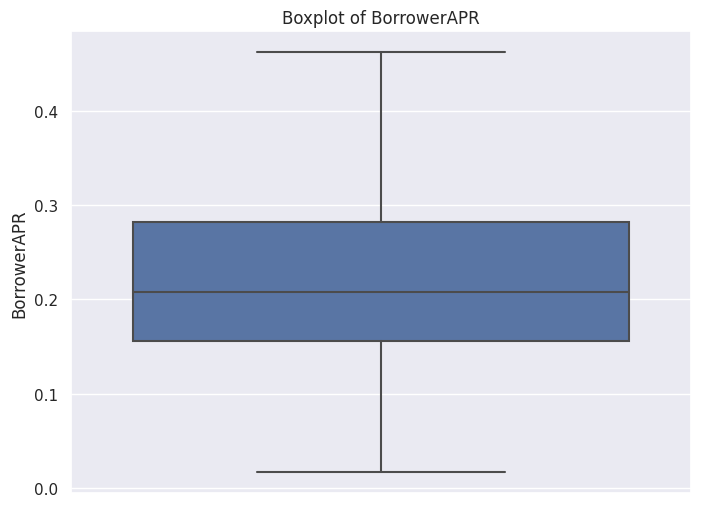

In [28]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'

# Select the 'BorrowerAPR' column
column = 'BorrowerAPR'

# Calculate quartiles and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Find outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

# Print the outliers
print(f"Outliers in {column}:")
print(outliers)

# Create a boxplot for the column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[column])
plt.title(f'Boxplot of {column}')
plt.show()

Outliers in BorrowerRate:
18326    0.45
22195    0.45
Name: BorrowerRate, dtype: float64


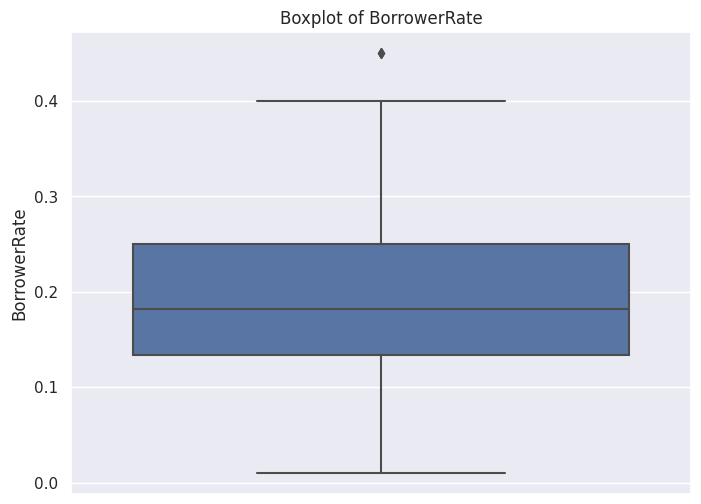

Outliers in LenderYield:
18326    0.4325
22195    0.4325
Name: LenderYield, dtype: float64


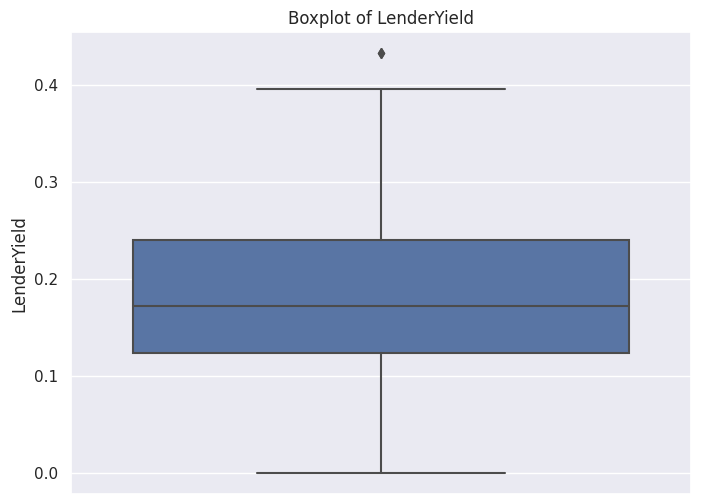

Outliers in EstimatedEffectiveYield:
15       0.2896
31       0.2896
74       0.2957
88       0.2917
94       0.2896
107      0.2896
112      0.2896
125      0.2957
157      0.2896
186      0.2896
200      0.2917
212      0.2896
260      0.2909
265      0.2896
266      0.2896
267      0.2957
272      0.2957
280      0.2896
306      0.2896
316      0.2896
335      0.2896
363      0.2896
381      0.2957
407      0.3057
428      0.2957
441      0.2957
449      0.2896
493      0.2896
495      0.2957
501     -0.0013
506      0.2896
527     -0.0677
537      0.2957
564      0.2896
570      0.2896
571      0.2957
598      0.2957
626      0.2896
664      0.3057
668      0.2896
678      0.2896
684      0.2896
704      0.3057
709      0.2896
714      0.2917
760     -0.0006
789      0.2917
834      0.2896
843      0.2957
863      0.2896
879      0.2896
881      0.2909
895      0.2896
921      0.2896
928      0.2957
951      0.2896
959      0.2896
960      0.2896
972      0.2896
994      0.2896
103

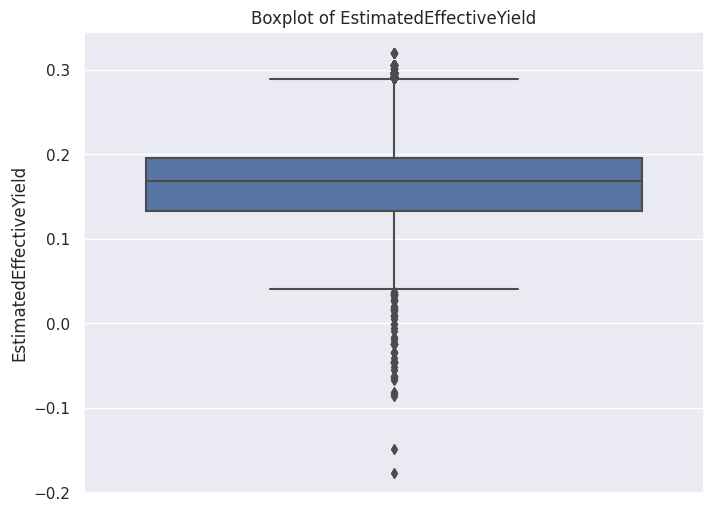

Outliers in EstimatedLoss:
15       0.1650
31       0.1625
71       0.1625
88       0.1650
94       0.1650
107      0.1650
110      0.1830
112      0.1650
157      0.1625
166      0.1625
186      0.1650
200      0.1650
212      0.1650
265      0.1650
266      0.1650
269      0.1900
280      0.1675
306      0.1625
316      0.1625
328      0.1625
335      0.1650
354      0.2400
363      0.1650
364      0.1700
379      0.1830
449      0.1675
475      0.1650
493      0.1650
501      0.1900
506      0.1650
527      0.3660
543      0.1800
564      0.1625
567      0.1800
570      0.1650
579      0.1650
626      0.1650
634      0.1700
668      0.1650
678      0.1650
684      0.1650
709      0.1650
714      0.1650
717      0.1800
736      0.1675
760      0.1800
768      0.1800
789      0.2030
834      0.1650
863      0.1625
879      0.1650
895      0.1650
921      0.1625
951      0.1650
959      0.1650
960      0.1650
972      0.1650
992      0.1675
994      0.1650
995      0.1625
1009     0.18

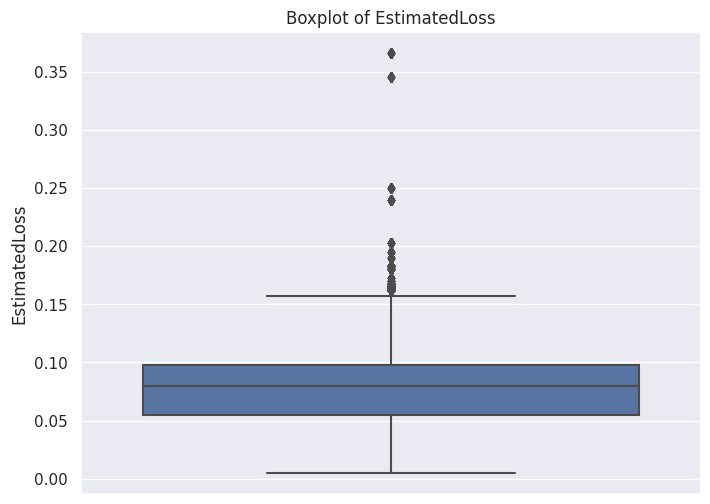

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'

# Select the columns for which you want to find outliers
columns = ['BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss']

# Iterate over each column
for column in columns:
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    # Print the outliers
    print(f"Outliers in {column}:")
    print(outliers)

    # Create a boxplot for the column
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [31]:
# Calculate the IQR for BorrowerRate
Q1 = df['BorrowerRate'].quantile(0.25)
Q3 = df['BorrowerRate'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from BorrowerRate
df = df[(df['BorrowerRate'] >= lower_bound) & (df['BorrowerRate'] <= upper_bound)]

# Calculate the IQR for LenderYield
Q1 = df['LenderYield'].quantile(0.25)
Q3 = df['LenderYield'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from LenderYield
df = df[(df['LenderYield'] >= lower_bound) & (df['LenderYield'] <= upper_bound)]

Data Encoding

In [32]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the data
# Replace 'df' with the actual name of your DataFrame

# Get columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

# Print columns with object data type
for column in object_columns:
    print(column)

ListingKey
ListingCreationDate
CreditGrade
LoanStatus
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
GroupKey
DateCreditPulled
FirstRecordedCreditLine
IncomeRange
LoanKey
LoanOriginationDate
LoanOriginationQuarter
MemberKey


In [33]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the data
# Replace 'df' with the actual name of your DataFrame

# List of categorical columns to encode
categorical_columns = ['LoanStatus', 'ProsperRating (Alpha)', 'CreditGrade','BorrowerState','Occupation', 'EmploymentStatus','GroupKey','IncomeRange',
'LoanKey','LoanOriginationQuarter']

# Create an empty DataFrame to store the encoded columns
df_encoded = pd.DataFrame()

# Iterate over each categorical column and perform one-hot encoding
for column in categorical_columns:
    encoded_columns = pd.get_dummies(df[column], prefix=column)
    df_encoded = pd.concat([df_encoded, encoded_columns], axis=1)

# Concatenate the encoded columns with the original DataFrame
df_final = pd.concat([df, df_encoded], axis=1)